# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

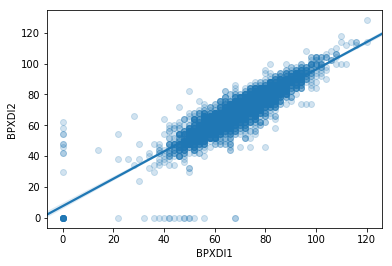

In [8]:
# Make the scatterplot
sns.regplot(x='BPXDI1', y='BPXDI2', data=da, scatter_kws={"alpha":0.2})

In [12]:
da.loc[:,['BPXDI1','BPXDI2','BPXSY1','BPXSY2']].dropna().corr()

,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.317497,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.298392
BPXSY1,0.317497,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.298392,0.962287,1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The correlation is HIGHEr between the 2 systolic and 2 diastolic measurements then between sys and diastolic

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

The 2nd measures are LESS correlated (0.298) than the 1st measures (0.33)

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

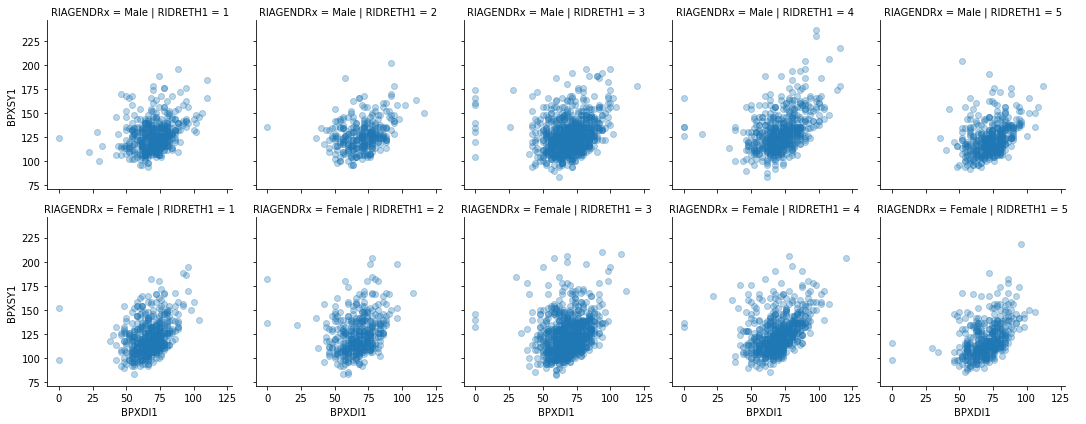

In [2]:
#Re-name the gender variable in a NEW var. 1=M, 2=F
da['RIAGENDRx']= da.RIAGENDR.replace({1:"Male", 2:"Female"})

#Create a FacetGrid of scatter plots:
sns.FacetGrid(da, col="RIDRETH1", row="RIAGENDRx").map(plt.scatter, "BPXDI1","BPXSY1", alpha=0.3).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [40]:
#Replace the education variable:
da["DMDEDUC2x"]=da.DMDEDUC2.replace({1:"<9",2:"9-11",3:"HS/GED",4:"Some college/AA",5:"College",7:"Refused",9:"Don't know"})

#Remove the "Don't know" and "refused" rows from table
db = da.loc[(da.DMDEDUC2x != "Don't know") & (da.DMDEDUC2x != "Refused"), :]

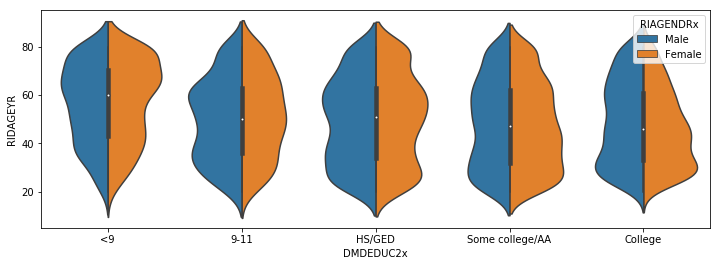

In [56]:
#Make violin plot. Split the violins in half over HUE value
plt.figure(figsize=(12,4))
sns.violinplot(x = db.DMDEDUC2x, y = db.RIDAGEYR, hue=db.RIAGENDRx, split=True, scale='count',
              order=["<9","9-11","HS/GED","Some college/AA","College"])

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

There are fewer older WOMEN (>50 years) with college education compared to men >50. Less YOUNG people dropped out of highschool (<9 violin)

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

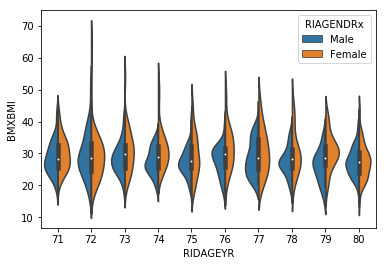

In [57]:
#Create groups of data by 10year age groups. Min=18, Max=80
d70_80 = da.loc[(da.RIDAGEYR >70) & (da.RIDAGEYR <=80)]  #shape = (812, 30)
d60_70 = da.loc[(da.RIDAGEYR >60) & (da.RIDAGEYR <=70)]
d50_60 = da.loc[(da.RIDAGEYR >50) & (da.RIDAGEYR <=60)]
d40_50 = da.loc[(da.RIDAGEYR >40) & (da.RIDAGEYR <=50)]
d30_40 = da.loc[(da.RIDAGEYR >30) & (da.RIDAGEYR <=40)]
d20_30 = da.loc[(da.RIDAGEYR >20) & (da.RIDAGEYR <=30)]
d10_20 = da.loc[(da.RIDAGEYR >10) & (da.RIDAGEYR <=20)]  #shape = (340, 30)
d10_20.shape

sns.violinplot(x=d70_80["RIDAGEYR"], y=d70_80["BMXBMI"], hue=d70_80["RIAGENDRx"], split=True)

In [74]:
#Create a CATEGORICAL data of AGES in bins of 10 years from the AGE data
cut_labels = ['10-20','20-30','30-40','40-50','50-60','60-70','70-80']
cut_bins = list(range(10,90, 10))

#Check that the counts in the bins make sense and match shape data above
pd.cut(da["RIDAGEYR"], bins=cut_bins).value_counts()

#Create a new variable with the CATEGORICAL bins for age group
da["Age_Group"] =pd.cut(da["RIDAGEYR"], bins=cut_bins, labels=cut_labels)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDEDUC2x,Age_Group
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,College,60-70
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Male,HS/GED,50-60
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Male,HS/GED,70-80
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Female,College,50-60
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female,Some college/AA,40-50


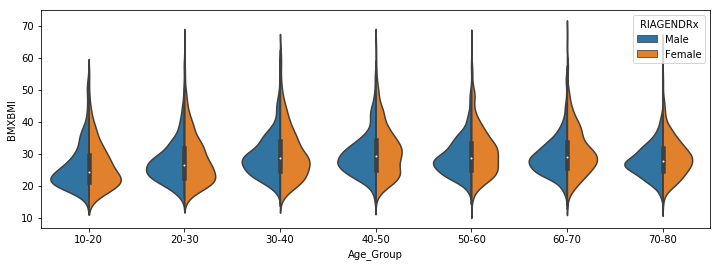

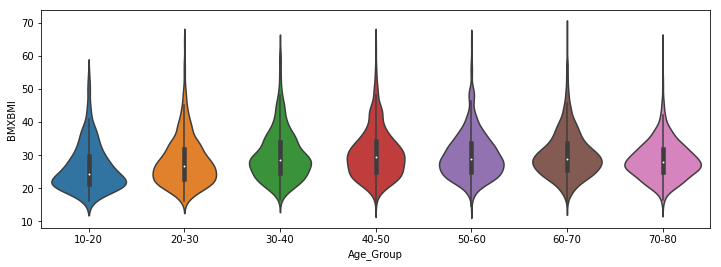

In [83]:
#Make Violin plot
plt.figure(figsize=(12,4))
sns.violinplot(data=da, x="Age_Group", y="BMXBMI",hue="RIAGENDRx", split=True, scale_hue=True)

plt.figure(figsize=(12,4))
sns.violinplot(data=da, x="Age_Group", y="BMXBMI")

__Q5a.__ Comment on the trends in BMI across the demographic groups.

BMI increases slightly with age, but decreases again after 70. Women tend to have more spread in their BMI compared to the men.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [10]:
#Rename the ethnicity and Health insurance variables
da["Health_Ins"]= da.HIQ210.replace({1:"Yes",2:"No",9:"Don't know"})
da["Ethnicity"]= da.RIDRETH1.replace({1:"Mex Amer",2:"Other Hisp",3:"White",4:"Black",5:"Other/multi-race"})
da.head()
#Remove the "don't know" rows for health insurance
dc = da.loc[(da.Health_Ins != "Don't know"), :]

#Create frequency table, normalize by COLUMNS
print(pd.crosstab(dc.Health_Ins, dc.Ethnicity, dropna=True))
pd.crosstab(dc.Health_Ins, dc.Ethnicity, dropna=True).apply(lambda z: z/z.sum(), axis=0)


Ethnicity   Black  Mex Amer  Other Hisp  Other/multi-race  White
Health_Ins                                                      
No            926       578         501               728   1535
Yes           113        93          74                65    111


Ethnicity,Black,Mex Amer,Other Hisp,Other/multi-race,White
Health_Ins,,,,,
No,0.891242,0.861401,0.871304,0.918033,0.932564
Yes,0.108758,0.138599,0.128696,0.081967,0.067436


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

White had the highest rate un-insured.